# function

In [5]:
source("F:/R file/DaiLab/wangying/FMT_project/figure_20210415/FMT_function20210415.R")

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Warning message:
"package 'patchwork' was built under R version 3.6.2"


# FMT20210415.R

## importing data and setting color for each group

character(0)

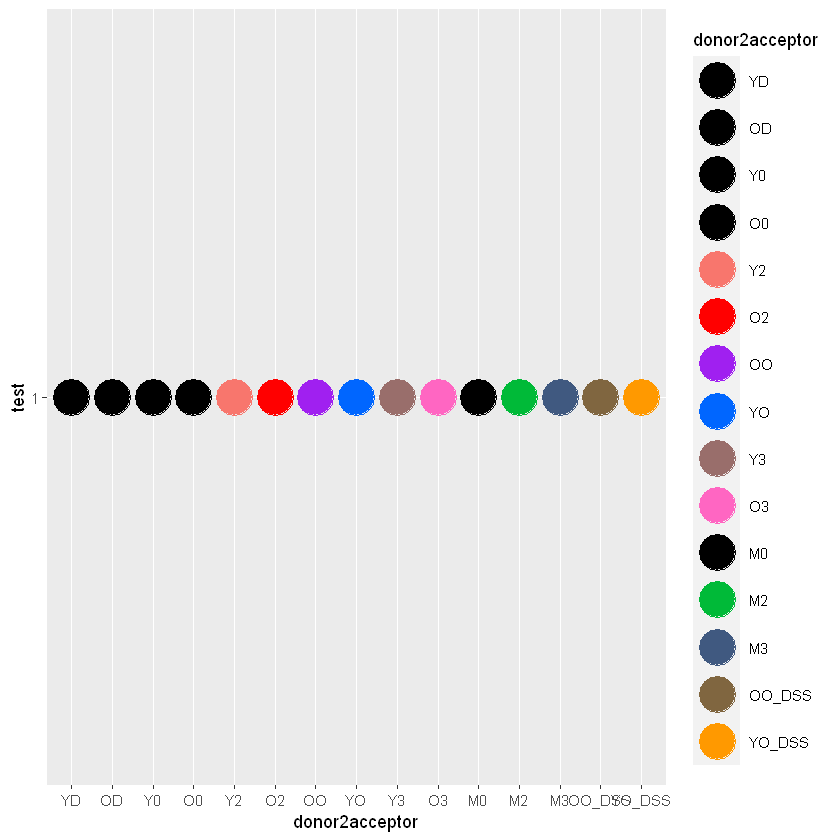

In [34]:
######  all figure in a paper order
setwd("F:/R file/DaiLab/wangying/FMT_project")
####### change the tree file , and use rbiom::unifrac to replace the phyloseq
## change color from red to orange.

file_name="figure_20210415"

####### figure names
## f for figure  + age + type , like f1 20m qpcr + metric
## sf for supplementary figure

### legend should be capital of the first alpha


## standardized the variable names

### remove some of the data like sample 1788

##### figure 1 ,2 pcoa baseline use O2,OO,YO
### figure 3 baseline use OO,YO
###  all baseline change name to baseline, in the significant ploting, different from 0910

#--------------
##### import data and preprocessing for 16S (no submit ) -------
meta <- read.csv("metadata_all.csv",header = T,row.names=1,na.strings = "",fill = TRUE,stringsAsFactors = FALSE)
meta$DSS <- as.factor(meta$DSS)
meta$treatment <- as.factor(meta$treatment)

# otu0 <-read.csv("feature_table_all.csv",header = T, row.names = 1)
# otu <- otu_filter(otu0,1/1000,0) 

# write.csv(otu,"feature_table_all_filter.csv")
otu= read.csv("feature_table_all_filter.csv",header = T, row.names = 1)

otu <- otu[,intersect(rownames(meta),colnames(otu))]



tax0 <- read.csv("taxonomy_all.csv",header = T,row.names = 1,na.strings = "",
                 fill = TRUE,stringsAsFactors = FALSE)
tax <- tax0[rownames(otu),]
tax= tax_detail(tax)




otu <- otu[rownames(tax),]
meta[is.na(meta)] <- -100
trefile <- read_tree("tree_all.nwk")
meta$donor2acceptor <- factor(meta$donor2acceptor,
                              levels = c("OD","YD","Y0","O0","Y2","O2","YY","OY","OO","YO","DSS2","DSS18",
                                         "Y3","O3","M0","M2","M3"))
meta= meta[-which(meta$id %in% c(55,56,1788,1784)),]



### tree refine
trefile=ape::drop.tip(trefile,setdiff(trefile$tip.label,rownames(otu)))
otu=otu[intersect(rownames(otu),trefile$tip.label),]

setdiff(trefile$tip.label,rownames(otu))


phylo_all <- phyloseq(otu_table(t(otu), taxa_are_rows = F),
                      sample_data(meta),tax_table(as.matrix(tax)),
                      phy_tree(trefile))

refined_data=list(meta=meta,otu=otu,tax=tax)
#######color data---------
# rgb2hsv(col2rgb("#F8766D"))
# rgb2hsv(col2rgb("orange"))

color_db <- na.omit(data.frame(donor2acceptor=unique(meta$donor2acceptor),value="0",test=1,stringsAsFactors = FALSE))
color_db$donor2acceptor = as.character(color_db$donor2acceptor) 
color_db[color_db$donor2acceptor=="O2","value"] <- hsv(0,1,1)
color_db[color_db$donor2acceptor=="O3","value"] <- hsv(0.9,0.6,1)
color_db[color_db$donor2acceptor=="Y2","value"] <- "#F8766D"
color_db[color_db$donor2acceptor=="Y3","value"] <- hsv(0.01,0.3,0.6)
color_db[color_db$donor2acceptor=="M2","value"] <-  "#00BA38"# green
color_db[color_db$donor2acceptor=="M3","value"] <- hsv(0.60,0.5,0.5)

color_db[color_db$donor2acceptor=="OO","value"] <- "purple" #purple
color_db["OO_DSS",]=c("OO_DSS",hsv(0.1,0.5,0.5),1)

color_db[color_db$donor2acceptor=="YO","value"] <-hsv(0.6,1,1)
color_db["YO_DSS",]=c("YO_DSS",hsv(0.10,1,1),1)  ## "orange"
# "#ADADAD"  gray
color_db[color_db$donor2acceptor=="O0"|color_db$donor2acceptor=="Y0"|color_db$donor2acceptor=="M0"
         ,"value"] <- "black"
color_db[color_db$donor2acceptor=="OD"|color_db$donor2acceptor=="YD","value"] <- "black"
color_db$donor2acceptor <- factor(color_db$donor2acceptor,
                                  levels = c("YD","OD","Y0","O0","Y2","O2","OO","YO",
                                             "Y3","O3","M0","M2","M3","OO_DSS","YO_DSS"))
color_db <- na.omit(color_db)
rownames(color_db) <- color_db$donor2acceptor
color_db <- color_db[order(color_db$donor2acceptor),]
ggplot(color_db,aes(donor2acceptor,test,color=donor2acceptor))+
  geom_point(size=10)+ scale_color_manual(values = color_db$value)


## QPCR

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")

Joining, by = "mix"

Joining, by = "mix"



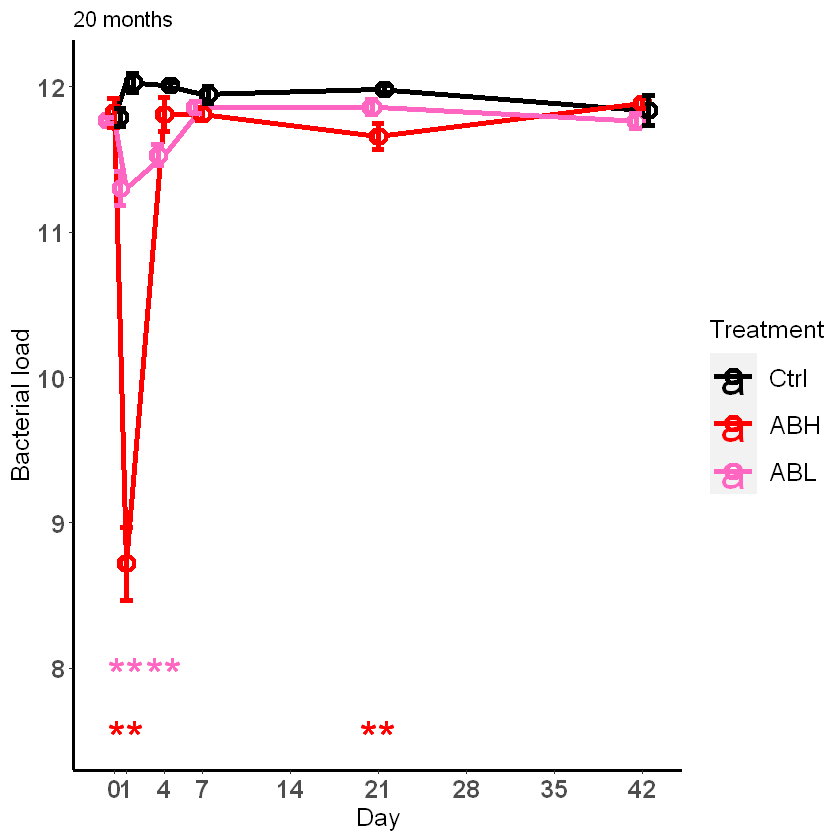

In [8]:
#### f1 qpcr -------------------
##### Old group
qpcr <- read.csv("QPCR/qPCR_data.csv")

qpcr$donor2acceptor <- factor(qpcr$donor2acceptor,
                              levels = c("O0","O2","O3"))
# qpcr=add_mix(qpcr,group = "donor2acceptor",time="timeFMT")

p<-errorbar_line_plot(df=qpcr,var1 = "donor2acceptor",var1_sub = c("O0","O2","O3"),
                      group = "donor2acceptor",time="timeFMT",signifi = TRUE,line="age",
                      sig_com = list(c("O0","O2"),c("O0","O3"))) +
  scale_color_manual(values =color_db[c("O0","O2","O3"),"value"],name="Treatment",
                     breaks = c("O0","O2","O3"),labels=c("Ctrl","ABH","ABL"))+
  labs(title="20 months",y="Bacterial load",x="Day")+
  guides(linetype="none")+
  # scale_linetype_manual(values=c( "solid"))+
  scale_x_continuous(breaks=c(0,1,4,7,14,21,28,35,42))
p

## slpha diversity

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")



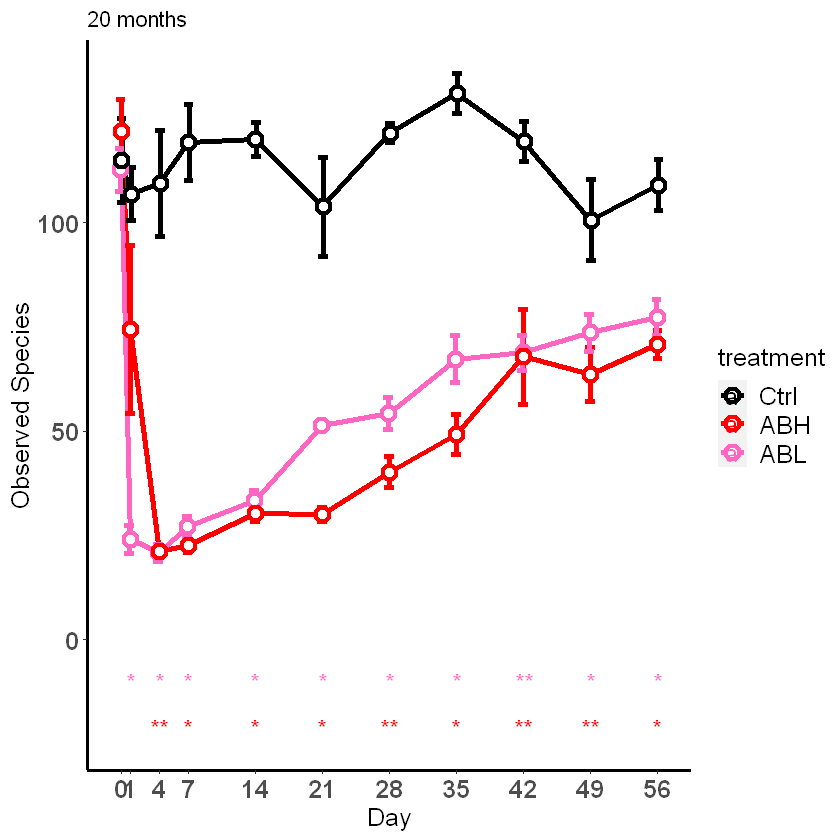

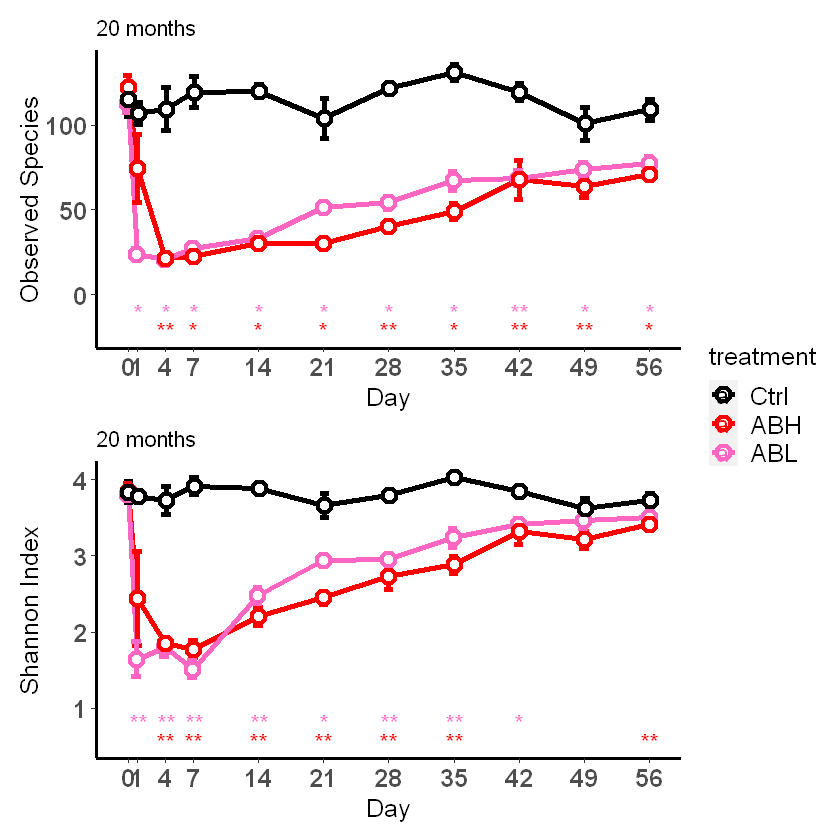

[[1]]

[[2]]


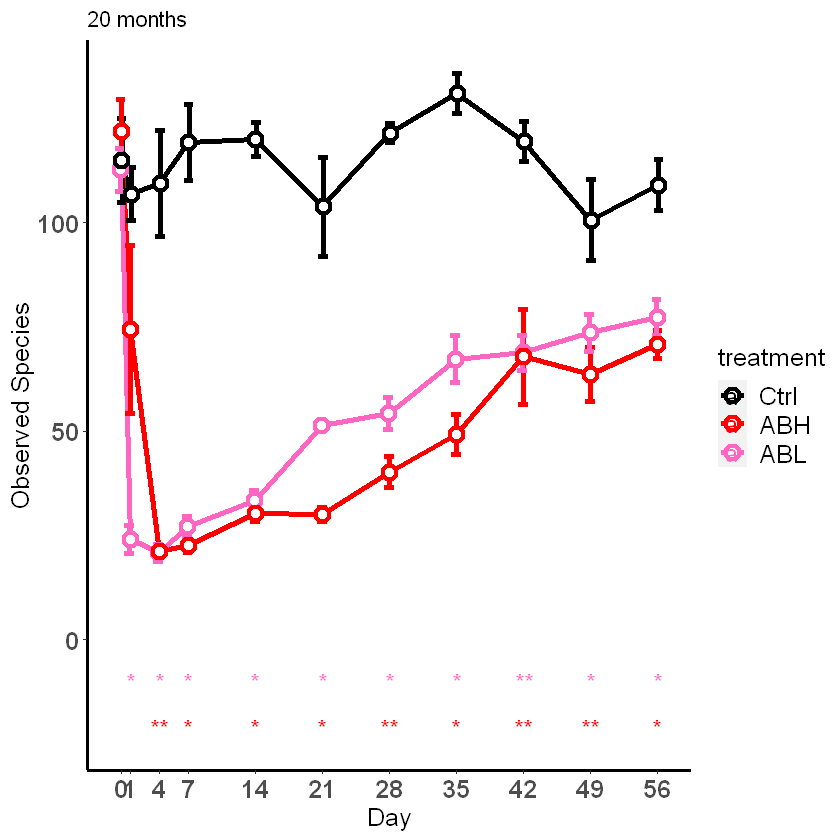

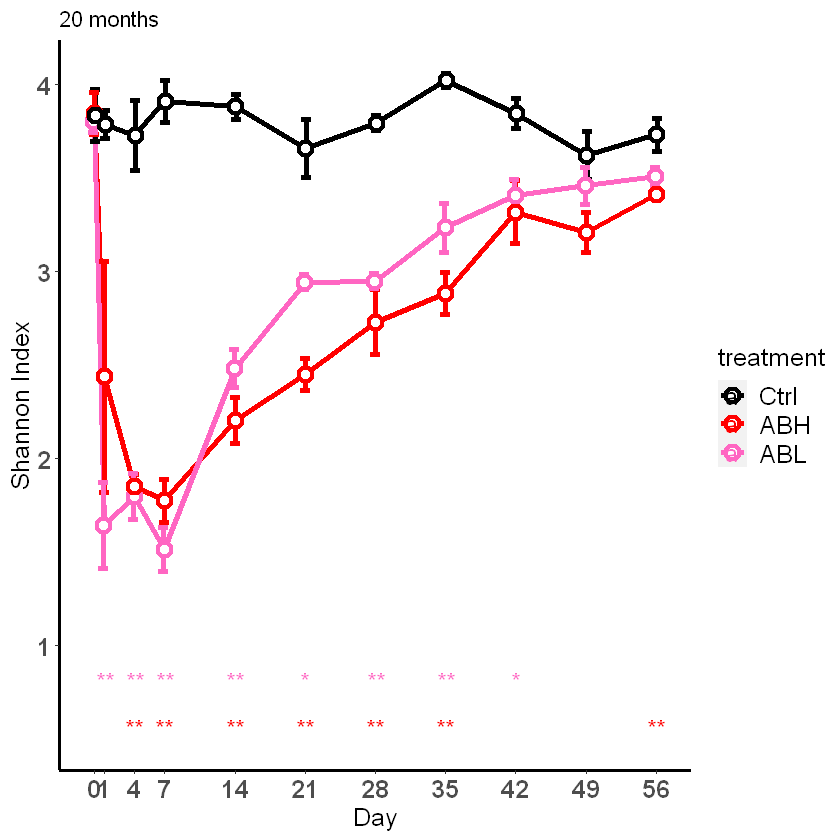

In [9]:
#### figure1 C  alpha diversity -----------
########* O group -------
phylo1 = phylo1_get(phylo_all,meta=refined_data$meta,var1 = "donor2acceptor",
                    var1_sub = c("Y2","O2","O0","Y0","Y3","O3"),var2 = "timeFMT",
                    var2_sub = c(0,1,4,7,14,21,28,35,42,49,56))





p1 <-  alpha_plot2(phylo_ls=phylo1,meta=meta,xlab="timeFMT",color_col = "donor2acceptor",line = "age",
                   var1 = "donor2acceptor",var1_sub = c("O0","O2","O3"),time = "timeFMT",
                   group="donor2acceptor",average = TRUE,sig_com = list(c("O0","O2"),c("O0","O3")),
                   title_name = "",measure = "Observed",scale=0.1,label_size = 5)+
  scale_color_manual(values =color_db[c("O0","O2","O3"),"value"],
                     name="treatment",
                     breaks = c("O0","O2","O3"),
                     labels=c("Ctrl","ABH","ABL"))+
  guides(linetype="none")+
  labs(title = "20 months ",x="Day",y="Observed Species")+
  scale_linetype_manual(values=c( "solid"))+
  scale_x_continuous(breaks=c(0,1,4,7,14,21,28,35,42,49,56))


# h=p1$data
p1

p2 <- alpha_plot2(phylo1,meta=refined_data$meta,xlab="timeFMT",color_col = "donor2acceptor",line = "age",
                  var1 = "donor2acceptor",var1_sub = c("O0","O2","O3"),time = "timeFMT",
                  group="donor2acceptor",average = TRUE,sig_com = list(c("O0","O2"),c("O0","O3")),
                  title_name = "",measure = "Shannon",scale=0.1,label_size = 5)+
  scale_color_manual(values =color_db[c("O0","O2","O3"),"value"],
                     name="treatment",
                     breaks = c("O0","O2","O3"),
                     labels=c("Ctrl","ABH","ABL"))+
  guides(linetype="none")+
  labs(title = "20 months ",x="Day",y="Shannon Index")+
  scale_linetype_manual(values=c( "solid"))+
  scale_x_continuous(breaks=c(0,1,4,7,14,21,28,35,42,49,56))


p1/p2 +plot_layout(guides = "collect")

p = list(p1,p2)
p

## HUMAnN2

In [39]:
########## figure3 D humann2 ##########################################
###########import data
# setwd("F:/R file/DaiLab/wangying/metagenome/humann2")
library(dplyr)
pathway = read.csv("humann2/pathway_refine.csv",row.names = 1)

# pathway1  = read.csv("F:/R file/DaiLab/wangying/metagenome/humann2/pathway_refine.csv",row.names = 1)
# pathway1 = data.frame(prim=rownames(pathway1),split= sapply(str_split(rownames(pathway1),": "),"[",2))

rownames(pathway) <- sapply(str_split(rownames(pathway),": "),"[",2)


pathway_norm = sweep(pathway,2,colSums(pathway),"/")



meta <- read.csv("humann2/meta_genome.csv",
                 row.names = 1,stringsAsFactors = FALSE)

meta[is.na(meta)] <- -100
meta<- subset(meta,rownames(meta)%in% colnames(pathway_norm))


meta$mix=paste(meta$donor2acceptor,meta$timeFMT,sep = "_")

humann2_list=list(meta=meta,pathway_norm=pathway_norm)



### pcoa bray-curtis

[1] "O2" "OD" "OO" "OY" "YO" "YD" "YY"

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



[1] O2 OD OO YD YO O2 O2 O2 O2 O2 OO OO OO OO YO YO YO YO YO O2 OD OO YD YO O2
[26] O2 O2 O2 O2 OO OO OO OO YO YO YO YO YO
Levels: YO OO O2 OD YD

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.



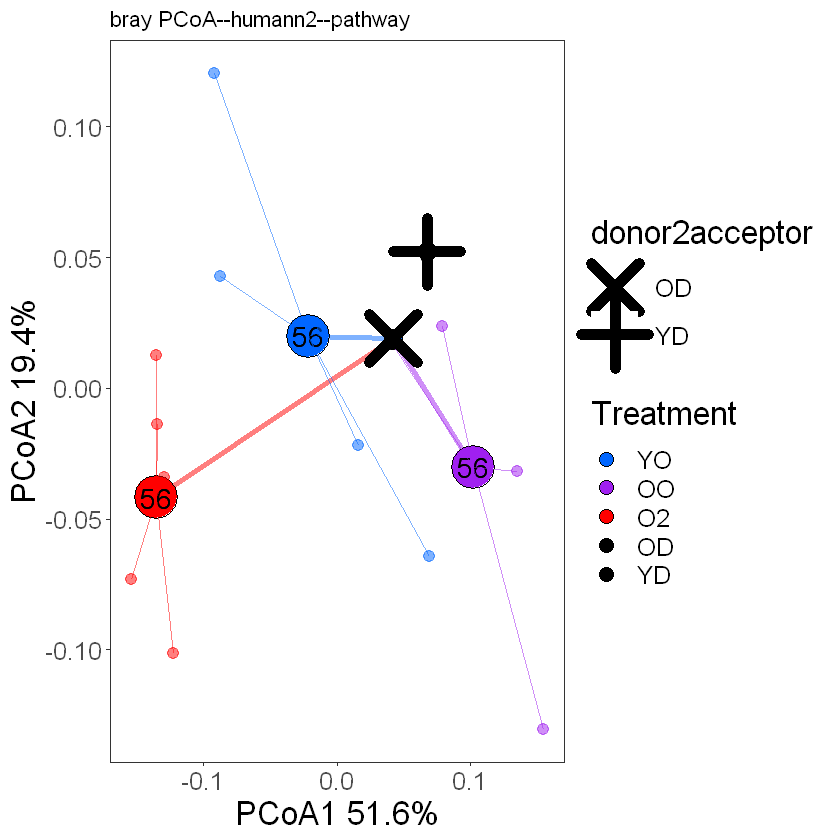

In [40]:
####*pcoa bray-curtis -----
meta$mix = paste(meta$donor2acceptor,meta$timeFMT,sep = "_")
res= add_group_mean(counts=pathway_norm,meta,time = "timeFMT",group = "donor2acceptor",
                    mean_second = list(c("OO","YO","O2"),c("YY","OY")),remove_baseline1 = TRUE)

pathway_norm2=res$counts

meta2 = res$meta

metric="bray"
all = pcoa_product(pathway_norm2,meta2,metric=metric)


data_ord=all$data_ord
pcoa=all$pcoa
unique(data_ord$donor2acceptor)


data_ord$donor2acceptor<-factor(data_ord$donor2acceptor,levels=c("YO","OO","O2","OD","YD"))

data_ord = data_ord[-which(rownames(data_ord) %in% c("YY_0~mean","OY_0~mean")),]

data_ord[c("O2_0~mean","OO_0~mean","YO_0~mean"),c("pc1","pc2","pc3")]=data_ord["OD",c("pc1","pc2","pc3")]
### add mean baseline 
p=pcoa_plot_size(data_ord,pcoa,metric=metric,title_name = "PCoA--humann2--pathway",size="timeFMT",
                 color = "donor2acceptor",shape = "donor2acceptor",shape_sub = c(21,22),
                 text="timeFMT")+ scale_fill_manual(values = color_db[c("YO","OO","O2","OD","YD"),"value"])+
  scale_color_manual(values = color_db[c("YO","OO","O2","OD","YD"),"value"])+
  scale_size_continuous(range=c(5,12),breaks = c(0,56),labels = c(0,56))


data1 <- data_ord[data_ord$donor2acceptor=="YD",]
data2 <- data_ord[data_ord$donor2acceptor=="OD",]

data_mix <-rbind(data1,data2) 
data_mix$donor2acceptor <-  factor(data_mix$donor2acceptor,
                                   levels = c("YO","OO","O2","OD","YD"))

p_data_mean=p$data 
p_data_mean[,c("pc1","pc2")]=p_data_mean[,c("pc1_mean","pc2_mean")]

new_data=rbind(p$data,p_data_mean)

new_data$donor2acceptor


p1=p+  geom_point(data=p$data,aes(pc1,pc2,color=p$data$donor2acceptor),size=3,alpha=0.5) +
  geom_line(data=new_data,aes(pc1,pc2,group=new_data$Row.names,color=new_data$donor2acceptor),
            size=0.5,alpha=0.5)+
  geom_point(data=data_mix,aes(x=pc1,y=pc2,shape=data_mix[,"donor2acceptor"]),
                 stroke=5,size=10)+ scale_shape_manual(values = c(4,3))+
  labs(fill="Treatment")+
  guides(color="none")
 
  
# stat_ellipse(data=p$data,show.legend = FALSE,aes(x=pc1,y=pc2,fill=donor2acceptor),
#              geom = "polygon",
#              alpha=0.2,level = 0.95) 


p1

### pathway heatmap

[1] "O2_56" "YO_56" "OO_56" "O2_0"  "YD"    "OD"

Joining, by = c("variable", "path", "value", "mix", "age", "comparison", "pval", "se_value", "sig_label")



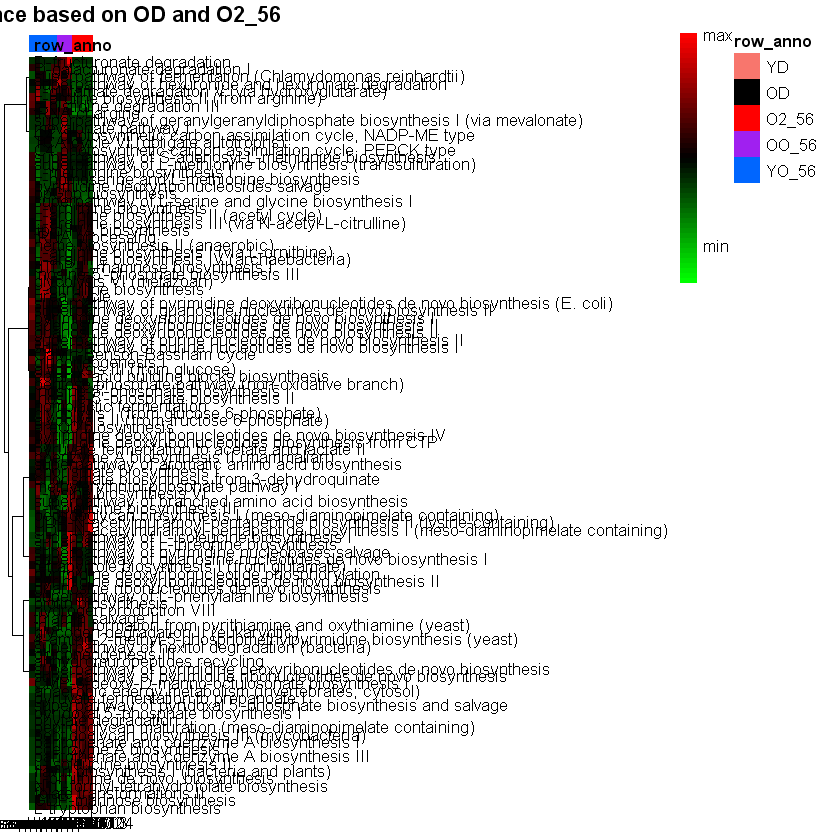

In [33]:
####* pathway heatmap ---------
#########metacyc  calculate the level7 and find the difference with wilcox test

metric="bray"
pathway3 = pathway
pathway3$path=rownames(pathway)

p_melt= reshape2::melt(data = pathway3,id.vars="path")
p_melt = merge(p_melt,meta[,c("mix","age")],by.x="variable",by.y="row.names")
p_melt[p_melt$mix %in% c("YY_0","OY_0"),"mix"]="YD"
p_melt[p_melt$mix %in% c("OO_0","YO_0"),"mix"]="OD"
unique(p_melt$mix)
p_melt$mix= factor(p_melt$mix,levels = c("YD","OD","O2_56","OO_56","YO_56"))
p_melt=na.omit(p_melt)

p_melt1=p_melt
# group_list=list(c("OD","YO_56"),c("OD","OO_56"),c("OD","O2_56"))

group_list=list(c("OD","O2_56"))  ## pathway difference based on OD and day 56

for (i in 1:length(group_list)) {
  
  p_melt1=sig_table_get(df=p_melt1,time="path",group = "mix",group_base = group_list[[i]][1],
                        group_change =  group_list[[i]][2])
  p_melt1=padjust_get(p_melt1,time="path")
}


### p_adjust 0.05

pmelt2= na.omit(p_melt1) %>%
  filter(p_adjust <0.05)

###get the DEP pathway for heatmap
path_diff= unique(pmelt2[,c("path","age")])
rownames(path_diff)= path_diff$path

res=add_group_mean(counts = pathway,meta=meta,time = "timeFMT",
                   mean_second = list(c("YO","OO"),c("YY","OY")),
                   remove_baseline1=TRUE,remove_baseline2=TRUE,
                   group = "mix")

pathway1= res$counts
meta1=res$meta
meta1$mix=factor(meta1$mix,levels = c("YD","OD","O2_56","OO_56","YO_56"))

#rowSums(pathway1)

meta1 = meta1[order(meta1$mix),]



p=pheatmap_plot(counts = pathway1,meta = meta1 ,DEG = path_diff,nchar=100,cluster_cols = FALSE,
                title_name = "pathway difference based on OD and O2_56 ",Annotation = TRUE,
                scale="row",
                row_colors = color_db[c("Y2","O0","O2","OO","YO"),"value"])

p

### LEFSE

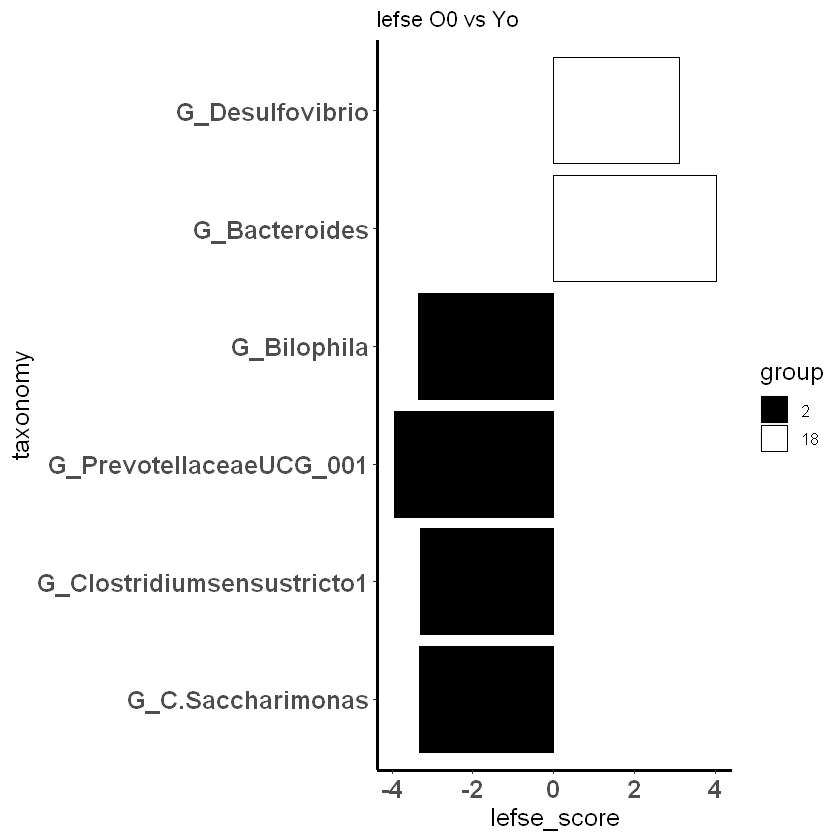

In [15]:
##########* lefse O0 vs Yo ---------
lefse_data=read.csv("lefse/lefse_data_ctrl_O0_Y0/R_result.csv",
                    row.names = 1)
lefse_data$group=as.factor(lefse_data$group)
lefse_data$taxonomy=factor(lefse_data$taxonomy,level=lefse_data$taxonomy)

p <- ggplot(lefse_data,aes(x=taxonomy,y=lefse_score,fill=group,color=group))+
  #facet_grid(cols = vars(res3[,"group"]),scale="free")+
  geom_bar(stat = "identity") + 
  scale_color_manual(values = c("black","black")) +
  scale_fill_manual(values=c("black","white"))+
  coord_flip()+ labs(title="lefse O0 vs Yo")+
  theme( panel.grid.minor = element_blank(),
         panel.background = element_blank(),panel.border = element_blank(),
         axis.line = element_line(colour = "black",linetype="solid",size = 1),
         panel.grid.major=element_line(colour=NA),axis.text=element_text(size = 15, face= "bold",family = ""),
         legend.text = element_text(size = 10),legend.title = element_text(size=15),axis.title=element_text(size=15))
p


## DAI

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")

Joining, by = "mix"



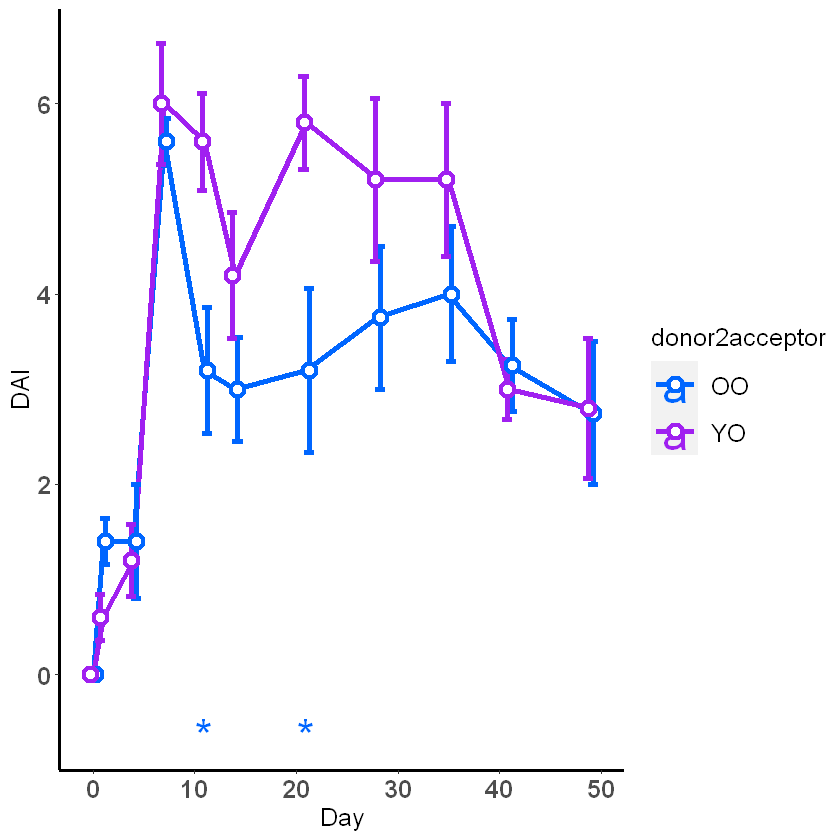

In [36]:
##### figure5 D DAI -------
dai <- read.csv("weight_DAI/FMT_DSS_DAI.csv")
dai$value<- as.numeric(dai$value)

dai <- na.omit(dai)

p <- errorbar_line_plot(df=dai,var1 = "donor2acceptor",var1_sub = c("YO","OO"),
                        group = "donor2acceptor",time="timeFMT",signifi = TRUE,sig_com = list(c("YO","OO")))+
  scale_color_manual(values =color_db[c("YO","OO"),"value"] )+labs(y="DAI")+
  labs(x="Day")

# p$data[p$data$timeFMT!=14,"pval"]<-NA
# p$data$pval <- round(p$data$pval,3)

p1 <- p +
  # geom_text(aes(y=position+2 ,label=pval),size=5) +
     geom_point(aes(x=p$data$timeFMT-p$data$Dodge),size=3,shape=21,fill="white",stroke=2)

p1


## weight

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 24 28 31 35 41 49

Joining, by = c("pval", "sig_label", "mix", "position", "timeFMT")

Joining, by = "mix"



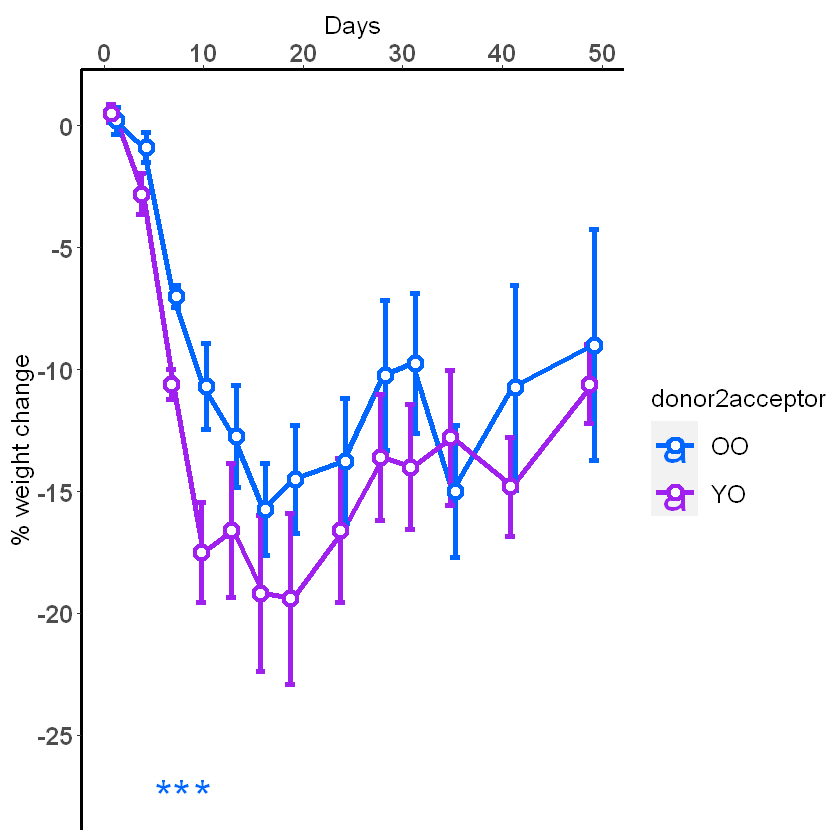

In [37]:
#####* figure weight   with integral areas ---------

weight <- read.csv("weight_DAI/FMT_DSS_weight.csv")
weight$value<- round(as.numeric(weight$value),2)*100
weight <- na.omit(weight)

unique(weight$timeFMT)

weight1 <- subset(weight,timeFMT %in% c(1,4,7,10,13,16,19,24,28,31,35,41,49))

p <- errorbar_line_plot(df=weight1,var1 = "donor2acceptor",var1_sub = c("YO","OO"),
                        group = "donor2acceptor",time="timeFMT",signifi = TRUE,
                        sig_com = list(c("YO","OO")),dis_index = 10)+
  scale_color_manual(values =color_db[c("YO","OO"),"value"] )+labs(y="% weight change")+
  scale_y_continuous(breaks = c(0,-5,-10,-15,-20,-25,-30))+
  scale_x_continuous(position = "top")


p1=p+geom_point(aes(x=p$data$timeFMT-p$data$Dodge),size=3,shape=21,fill="white",stroke=2)
p1


# FMT_relative20210415.R

## relative abundance plot

Joining, by = c(".", "name")

Joining, by = "name"

`summarise()` has grouped output by 'donor2acceptor', 'label_id', 'sampleId', 'variable', 'timeFMT'. You can override using the `.groups` argument.



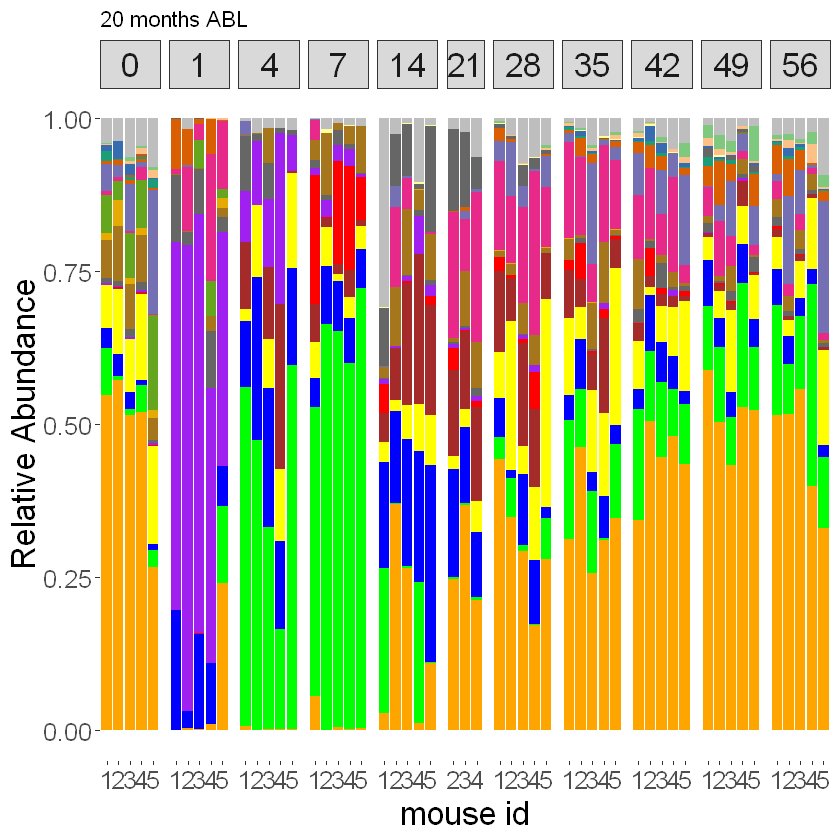

In [19]:
######  all figure in a paper order
setwd("F:/R file/DaiLab/wangying/FMT_project")
####### change the tree file , and use rbiom::unifrac to replace the phyloseq
## change color from red to orange.

file_name="figure20210415"





######## relative abundance preprocessing -------------
phylo1 = phylo1_get(phylo_all,meta,var1 = "donor2acceptor",
                    var1_sub = c("O2","Y2","O3","Y3","O0","Y0"),var2 = "timeFMT",
                    var2_sub = c(0,1,4,7,14,21,28,35,42,49,56))

phylo2 = phylo1_get(phylo_all,meta,var1 = "donor2acceptor",
                    var1_sub = c("OO","YO","OD","YD"),var2 = "timeFMT",
                    var2_sub = c(-1,0,1,4,7,14,21,28,35,42,49,56))
###merge
phylo3 <- merge_phyloseq(phylo1,phylo2)

otu_tax1 <- otu_tax1_get(phylo_all=phylo3,tax_Name="Genus",meta=meta)



# h=merge(tax,data.frame(Genus=colnames(otu_tax1)),by="Genus")


meta1 <- meta[rownames(otu_tax1),]

tax_melt<- relative_abun_get(otu_tax1,meta1,time="timeFMT",time_type="num",
                             var1="donor2acceptor",var2 = "label_id")

### top based on all data 底层级包含在高层级
tax_melt1=relative_abun_second_get(tax_melt,tax0=tax,Time="timeFMT")


#######remove some of the taxonomy and shorten the names 
tax_level=data.frame(old=levels(tax_melt1$variable))
tax_level$new=sapply(str_split(tax_level$old,"[-gut]*-group"),"[",1)
tax_level[tax_level$new=="G_gut-metagenome","new"]="others"
##### relevels again , base on the specified taxonomy of each taxonomy 每个进化层次只保留一个
tax_melt1$donor2acceptor <- factor(tax_melt1$donor2acceptor,levels = c("O2","Y2","OO","YO","YD",
                                                                       "OD","O3","Y3","O0","Y0"))
tax_melt1$label_id = str_sub(tax_melt1$label_id,2,2)

tax_melt1$variable=factor(tax_melt1$variable,levels = tax_level$old,labels = tax_level$new)

tax_melt1 = merge(tax_melt1,meta[,c("id","cage")],by.x="sampleId",by.y="row.names")

tax_melt1$timeFMT=as.numeric(as.matrix(tax_melt1$timeFMT))



color2taxonomy <- data.frame(taxonomy=levels(tax_melt1$variable),
                             genus_color=c("grey",distinctive_colors(length(unique(tax_melt1$variable))-8),"purple","red","brown","cyan","blue","green","orange"))

tax_melt2 <- subset(tax_melt1, donor2acceptor %in% c("O2","Y2","O3","Y3","YO","OO","Y0","O0"))

#### add the same  taxonomy of each day each mouse before get the mean value , some taxonomy may has two value in a day of a mouse
tax_melt2=tax_melt2 %>% group_by(donor2acceptor,label_id,sampleId,variable,timeFMT,cage) %>%
  summarise(value=sum(value)) %>% ungroup() %>%as.data.frame()


p1 = relative_abun_plot(tax_melt1,var1="donor2acceptor",var1_sub = "O3",xvalue_order = FALSE,
                        xvalue="label_id",facet="timeFMT",tax="Genus",title_name = "20 months ABL",
                        color_g = length(unique(tax_melt1$variable)))+ guides(fill="none")+
  labs(x="mouse id", y="Relative Abundance")
p1

## abosulate abundance plot

Joining, by = c("donor2acceptor", "sampleId", "timeFMT")

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



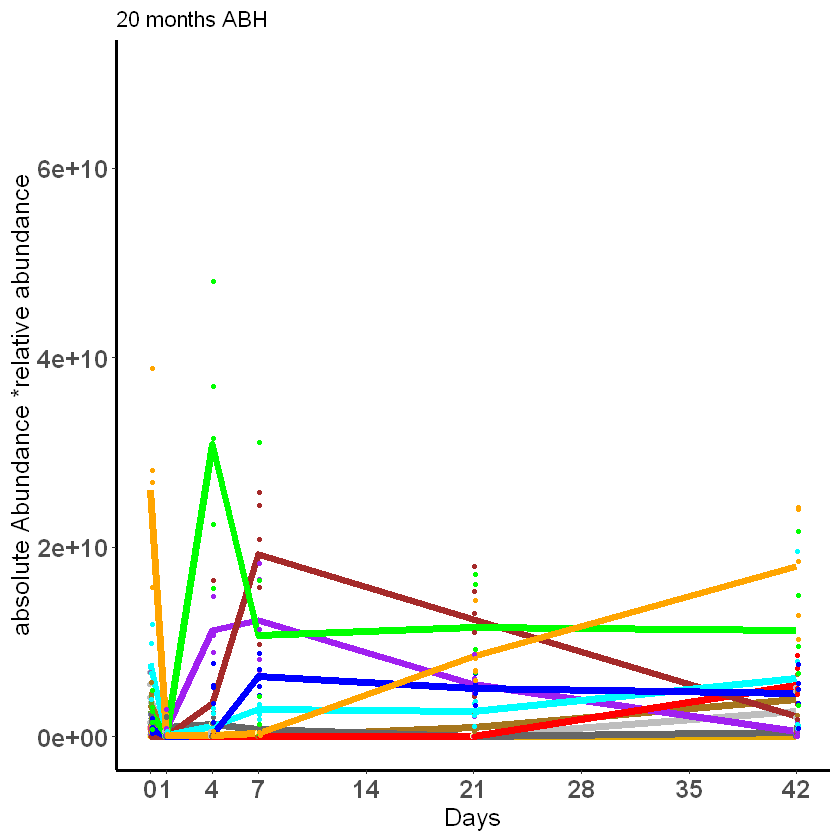

In [20]:
###### sf  absolute abundace ------------------
qpcr <- read.csv("QPCR/qpcr_refine.csv")
qpcr$raw_reads=qpcr$res_log10.^10
qpcr1=merge(qpcr,meta[,c("label_id","id")],by.x="sampleId",by.y="row.names")
# qpcr1$timeFMT=paste("D",qpcr1$timeFMT,sep = "_")


# h=demelt(data=qpcr1[,c("label_id","raw_reads","timeFMT")],value="raw_reads",y = "label_id",x = "timeFMT")



# h=dcast(timeFMT~sampleId,qpcr1[,c("sampleId","raw_reads","timeFMT")])
## calculate the absolute value with qpcr
tax_melt2$timeFMT= as.numeric(as.matrix(tax_melt2$timeFMT))

tax_melt3= full_join(tax_melt2,qpcr[,c("sampleId","donor2acceptor","timeFMT","res_log10.")]) %>% 
  na.omit()
 
tax_melt3$ab_value= tax_melt3$value * (tax_melt3$res_log10.)^10

###### old group  ABX
p1 <- line_plot2(tax_melt = tax_melt3,var1 = "donor2acceptor",var1_sub = "O2",color_level=color2taxonomy,
                 Value = "ab_value",
                 group = "variable",time = "timeFMT",tax_num = length(unique(tax_melt3$variable)),mad_all = TRUE )+
  scale_x_continuous(breaks=c(0,1,4,7,14,21,28,35,42,49,56)) +guides(color="none")+
  labs(x="Days",y="absolute Abundance *relative abundance",title = "20 months ABH")+
  # scale_y_log10(limits=c(1,1e+12)) +
  ylim(NA,7e+10)

p1

# FMT_PCoA20210415.R

## point plot

[1] O2 O0
Levels: OD YD Y0 O0 Y2 O2 YY OY OO YO DSS2 DSS18 Y3 O3 M0 M2 M3

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.



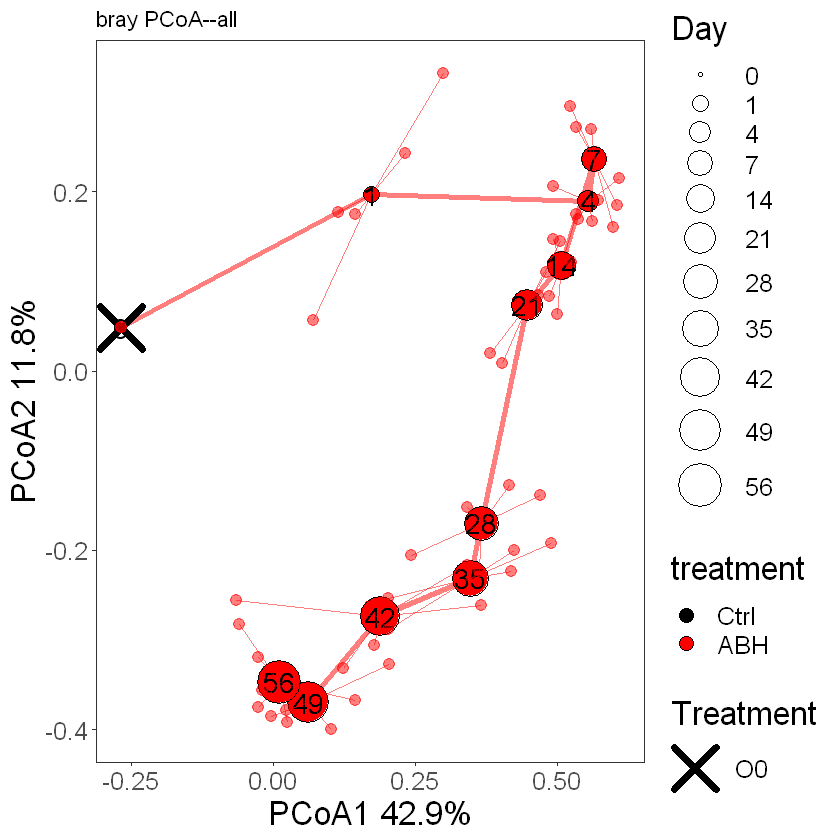

In [35]:
######  all figure in a paper order
setwd("F:/R file/DaiLab/wangying/FMT_project")
####### change the tree file , and use rbiom::unifrac to replace the phyloseq


file_name="figure_20210415"

##### all the PCoA used the same metric, only for wunifrac and bray 
metric="bray"


####
#### FMT baseline 使用30 个数据，figure1 D 使用control的5个数据




###### figure1. D PCoA and signifi-----------
##### O2 ,with different type of point ploting , FMT all group and distance

phylo1 = phylo1_get(phylo_all,meta,var1 = "donor2acceptor",
                    var1_sub = c("O2","O0"))




all = pcoa_product(Data=phylo1,meta,metric=metric,trefile=trefile)
data_ord=all[[1]]
pcoa=all[[2]]
unique(data_ord$donor2acceptor)

data_ord$donor2acceptor <- as.character(data_ord$donor2acceptor)


data_ord$timeFMT<- as.numeric(data_ord$timeFMT)

######## make the control time to day0, and day0 of O2 and O3 to control
for (i in c("O0")) {
  data_ord[data_ord$donor2acceptor==i,"timeFMT"]=0
}




for (i in c("O2","O3")) {
  ii=paste(substr(i,1,1),"0",sep="")
  data_ord[data_ord$donor2acceptor==i& data_ord$timeFMT==0,"donor2acceptor"]=ii
}



data_ord1 = dd_rowmean2(data1=subset(data_ord,donor2acceptor %in% c("O0")),
                        var1 = "pc1",var2 = "pc2",var3 = "pc3",
                        group1 = "donor2acceptor")

data_ord1=data_ord1[c("O0"),]
data_ord1$donor2acceptor = "O0"
data_ord2=data_ord1[c("O0"),]
data_ord2$donor2acceptor="O2"

data_ord1 = rbind(data_ord1,data_ord2,data_ord[data_ord$timeFMT!=0,])

data_ord1$donor2acceptor = factor(data_ord1$donor2acceptor,levels =c("O0","O2","O3") )
data_ord1$timeFMT <- as.numeric(data_ord1$timeFMT)

### all group 
p <- pcoa_plot_size(data_ord1,pcoa,metric=metric,title_name = "PCoA--all",size="timeFMT",
                    color = "donor2acceptor",shape = "donor2acceptor",shape_sub = c(21,22),
                    var1 = "donor2acceptor",var1_sub = c("O0","O2"),
                    # var1 = "timeFMT",var1_sub = c(0,4,21,42),
                    text="timeFMT")+ 
  # geom_point(data=data_ord1[data_ord1$timeFMT==0,],aes(x=pc1,y=pc2,shape=donor2acceptor))+
  # scale_shape_manual(values=c(21))+
  scale_fill_manual(values = color_db[c("O0","O2"),"value"],
                    name="treatment",breaks = c("O0","O2"),labels=c("Ctrl","ABH")
                    )+
  scale_color_manual(values = color_db[c("O0","O2"),"value"])+
  scale_size_continuous(range=c(1,12),breaks = seq(1,11),
                        labels = c(0,1,4,7,14,21,28,35,42,49,56))

p_data_mean=p$data 
p_data_mean[,c("pc1","pc2")]=p_data_mean[,c("pc1_mean","pc2_mean")]

new_data=rbind(p$data,p_data_mean)



p1=p+ geom_point(data=subset(data_ord1,donor2acceptor %in% c("O0")),
                aes(x=pc1,y=pc2,color=donor2acceptor,shape=donor2acceptor),
                stroke=3,size=10)+ 
  scale_shape_manual(values = c(4))+
  geom_point(data=p$data,aes(pc1,pc2),color=color_db[c("O2"),"value"],size=3,alpha=0.5) +
  guides(color="none")+
  geom_line(data=new_data,aes(pc1,pc2,group=new_data$Row.names),color=color_db[c("O2"),"value"],
            size=0.5,alpha=0.5) + 
  labs(size="Day",shape="Treatment")


p1

## distance significance bar plot

[1] O3 O2 O0
Levels: OD YD Y0 O0 Y2 O2 YY OY OO YO DSS2 DSS18 Y3 O3 M0 M2 M3

Joining, by = c("donor2acceptor", "comparison", "pval", "sig_label", "y", "xend", "sig_label_y", "sig_label_x")

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



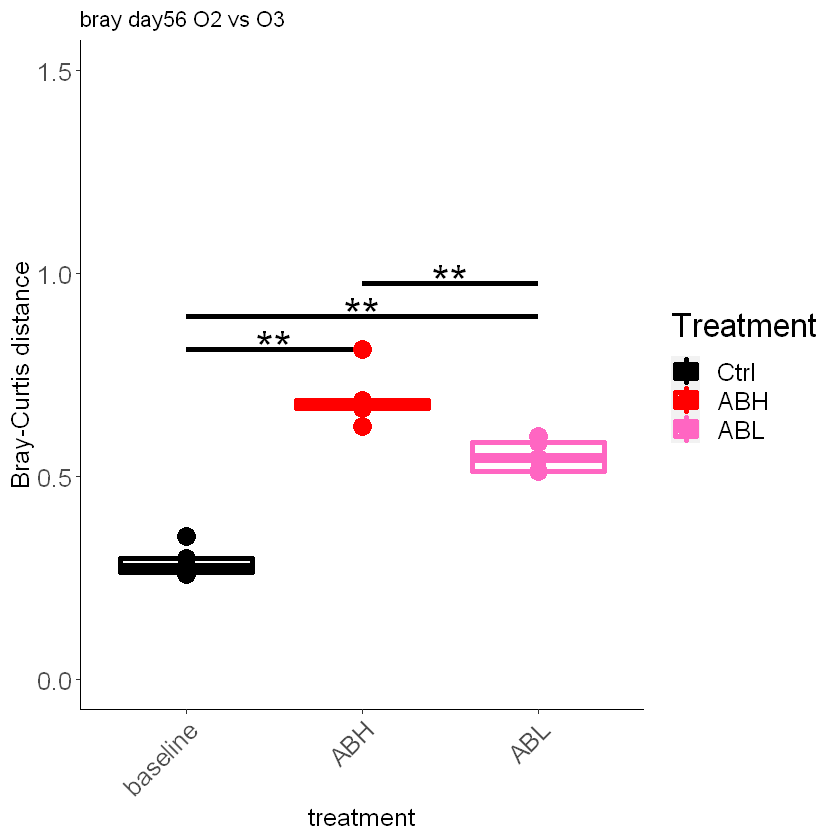

In [22]:
#######* distance and significance  -------
####figure1 D.2  significant  box plot  , baseline: day56 of control
phylo1 = phylo1_get(phylo_all,meta,var1 = "donor2acceptor",
                    var1_sub = c("O3","O2","O0"),var2 = "timeFMT",var2_sub = c(0,56))



# metric="wunifrac"
all = pcoa_product(phylo1,meta,metric=metric,trefile=trefile)
data_ord=all[[1]]
pcoa=all[[2]]
unique(data_ord$donor2acceptor)


pcoa_distance <- all[[3]] %>% as.matrix()

dis_melt = distance_refine(pcoa_distance,meta,mouse_id="label_id",
                           group="donor2acceptor",time="timeFMT",time_pos=3,time_base = "0")

# ##### change the name of O3 day0 and O2 day0 to the same name baseline before run baseline get 使用5个点
dis_melt[dis_melt$variable==0 & dis_melt$donor2acceptor %in% c("O0"),"donor2acceptor"]="O_base"


#### chagne the name of O3 and O2 and O0 day 0 to the same name 
# meta1=meta

meta1=data.frame(phylo_all@sam_data )


meta1$donor2acceptor=as.character(meta1$donor2acceptor)
meta1[meta1$timeFMT==0 & meta1$donor2acceptor %in% c("O0","O2","O3"),"donor2acceptor"]="O_base"


base_distance<- distance_base_product(data=phylo1, meta=meta1,var1="timeFMT",var1_sub="0",
                                      group="donor2acceptor",group_sub=c("O_base"),
                                      metric=metric, trefile=trefile)

dis_melt$mix=paste(str_sub(dis_melt$id,1,2),
                   dis_melt$donor2acceptor,"0",sep = "_")

#### change the value of the day0 
for (i in rownames(base_distance)) {
  dis_melt[dis_melt$mix==i& dis_melt$variable==0,"value"] <- base_distance[i,"value"]
}

dis_melt$donor2acceptor=factor(dis_melt$donor2acceptor,levels = c("O_base","O2","O3"),
                               labels = c("baseline","ABH","ABL"))

###remove the other value of each group
dis_melt=dis_melt[dis_melt$value!=0,]
### with p adjust
p=sig_box_plot(df=dis_melt,var1 = "donor2acceptor",var1_sub = c("baseline","ABH","ABL"),
               # com=list(c("O2","O3"),c("O_base","O2"),c("O_base","O3")),
               var2 = "variable",var2_sub = c(0,56),
               time="donor2acceptor") +
  scale_color_manual(breaks = c("baseline","ABH","ABL"),labels=c("Ctrl","ABH","ABL"),
                     values = color_db[c("O0","O2","O3"),"value"])+
  labs(title = paste(metric,"day56 O2 vs O3"),y="Bray-Curtis distance",color="Treatment")+
  ylim(0.001,1.5) + labs(x="treatment")

p 



## line plot

[1] O2 OD OO YO YD
Levels: OD YD Y0 O0 Y2 O2 YY OY OO YO DSS2 DSS18 Y3 O3 M0 M2 M3

[1] "OD"    "YD"    "Y0"    "O0"    "Y2"    "O2"    "YY"    "OY"    "OO"   
[10] "YO"    "DSS2"  "DSS18" "Y3"    "O3"    "M0"    "M2"    "M3"

[1]  0  1 14 21 28 35  4 42 49 56  7

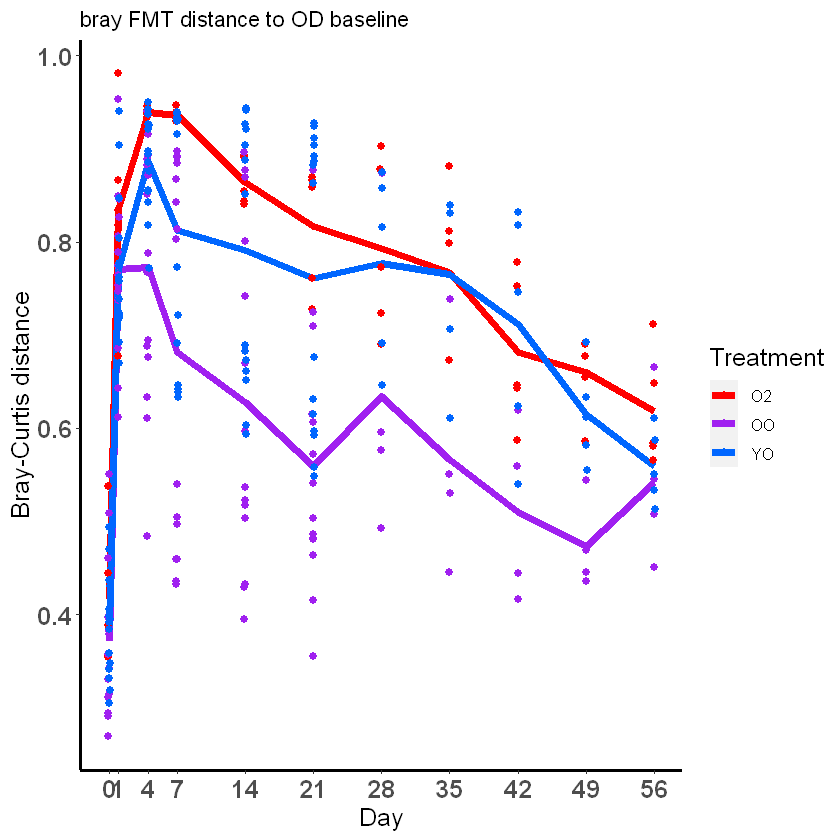

In [23]:
####* distance lineplot -----------
##########  all day distance to baseline of OO and YO as old donor baseline
######## day21 to baseline, keep the baseline of each time point, and use OO YO as baseline

phylo1 = phylo1_get(phylo_all,refined_data$meta,var1 = "donor2acceptor",
                    var1_sub = c("O2","OO","YO","OY","YY"),var2 = "timeFMT",var2_sub = c(0,1,4,7,14,21,28,35,42,49,56))
metric="bray"
all = pcoa_distance_product2(data=phylo1,meta,metric=metric,time="timeFMT", remove_baseline = FALSE,
                             trefile=trefile,mean_second = list(c("OO","YO"),c("YY","OY")),
                             group = "donor2acceptor",group_sub=c("OO","YO","YD","OD","O2"))


data_ord=all$data_ord
pcoa=all$pcoa
unique(data_ord$donor2acceptor)
levels(data_ord$donor2acceptor)

pcoa_distance <- all$Distance %>% as.matrix()
pcoa_distance =  pcoa_distance[-which(!is.na(str_match(rownames(pcoa_distance),"mean"))),
                               -which(!is.na(str_match(rownames(pcoa_distance),"mean")))] #%>% as.data.frame()



######### distance to old mean donor or young mean donor
dis_melt = rbind(distance_refine3(pcoa_distance,meta=data_ord,mouse_id="label_id",
                            group="donor2acceptor",time="timeFMT",time_pos=3,time_base = "0"),
                 distance_refine3_2(pcoa_distance,meta=data_ord,mouse_id="label_id",
                                  group="donor2acceptor",time="timeFMT",time_pos=3,time_base = "0"))
                 

dis_melt$id=sapply(str_split(dis_melt$id,"_"),"[",1)
dis_melt$cage = str_sub(dis_melt$id,1,1)
dis_melt$mix = paste(dis_melt$donor2acceptor,dis_melt$distanceTo,sep = "_")

dis_melt1=mean_line_get(dis_melt,time="timeFMT",group="mix",value="value")
dis_melt1$timeFMT=as.numeric(dis_melt1$timeFMT)

# dis_melt1$timeFMT=as.factor(dis_melt1$timeFMT)
unique(dis_melt1$timeFMT)
# dis_melt2=dis_melt1[dis_melt1$cage!=k ]

###  old group to old mean donor
p=ggplot(dis_melt1[dis_melt1$distanceTo=="OD",],aes(x=timeFMT,y=value,color=donor2acceptor))+
  geom_line(aes(y=mean,group=donor2acceptor),size=2)+
  geom_point(size=2,position = position_dodge2(width = 0.2))+
  theme( panel.grid.minor = element_blank(),
         panel.background = element_blank(),panel.border = element_blank(),
         axis.line = element_line(colour = "black",linetype="solid",size = 1),
         panel.grid.major=element_line(colour=NA),axis.text=element_text(size = 15, face= "bold",family = ""),
         legend.text = element_text(size = 10),legend.title = element_text(size=15),axis.title=element_text(size=15))+
  scale_color_manual(values = color_db[c("O2","OO","YO"),"value"])+
  labs(title=paste(metric,"FMT distance to OD baseline"),x="Day",
                   y="Bray-Curtis distance",color="Treatment")+
  scale_x_continuous(breaks=c(0,1,4,7,14,21,28,35,42,49,56))

p


# FMT_rna20210415.R

In [24]:
######  all figure in a paper order
setwd("F:/R file/DaiLab/wangying/FMT_project")
####### change the tree file , and use rbiom::unifrac to replace the phyloseq
## change color from red to orange.

file_name="figure_20210415"

#### rna---------

# setwd("F:/R file/DaiLab/wangying/rna_seq")
library("GenomicAlignments")
library(dplyr)

### import data for rna ------
counts <- read.csv("F:/R file/DaiLab/wangying/FMT_project/rna_seq/all_counts.csv",row.names = 1)
colSums(counts)

## filter some of the gene id, which is not necessary,
filter_counts =read.csv("F:/R file/DaiLab/wangying/FMT_project/rna_seq/rna_filter.csv")


counts=counts[setdiff(rownames(counts),filter_counts$id),]
counts=counts[is.na(str_match(rownames(counts),".*Rik|Gm.*|.*-ps.*|Ig*")),]

colSums(counts)

######## filter the genes with less than 5 reads in at least one sample
counts=counts[rowSums(counts>5)>1,]

# rowSums(counts>5)

colnames(counts)<- sapply(str_split(colnames(counts),"_"),"[",1 )

meta <- read.csv("F:/R file/DaiLab/wangying/FMT_project/rna_seq/metadata.csv",row.names = 1)

meta$mix <- paste(meta$treatment,meta$treatment_time,sep = "-")

meta=meta[-which(rownames(meta) %in% c("ZL30","ZL28")),]

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading req

ZL1     ZL10     ZL11     ZL12     ZL13     ZL14     ZL15     ZL16 
27726423 31694478 22408610 28185862 24084873 19427778 17182182 16288180 
    ZL17     ZL18     ZL19      ZL2     ZL20     ZL21     ZL22     ZL23 
19910764 19824593 19136715 16391464 17873196 19964238 20225688 18411897 
    ZL24     ZL25     ZL26     ZL27     ZL28     ZL29      ZL3     ZL30 
19183400 19106732 18197668 17566930 18661220 15373396 18538249 16686732 
    ZL31     ZL32     ZL33     ZL34     ZL35     ZL36     ZL37     ZL38 
17333245 17461449 20139629 18419072 17614416 18037667 18063719 16379553 
    ZL39      ZL4     ZL40     ZL41     ZL42     ZL43     ZL44     ZL45 
16810871 17772250 16684888 17175856 16786621 18456632 15725789 18478699 
    ZL46     ZL47     ZL48     ZL49      ZL5     ZL50     ZL51     ZL52 
17597722 22489219 18929349 19973911 19145291 17646379 18946351 25405795 
    ZL53     ZL54     ZL55     ZL56     ZL57     ZL58     ZL59      ZL6 
18730761 18036683 17511005 19936843 17264025 18066220 18827473 17972017 
    ZL60     ZL61     ZL62     ZL63     ZL64     ZL65     ZL66      ZL7 
14765218 17895767 18539842 18394938 19827561 18992428 25390352 22151397 
     ZL8      ZL9 
18276054 21139428

ZL1     ZL10     ZL11     ZL12     ZL13     ZL14     ZL15     ZL16 
26416907 30258397 21074830 26793385 22852309 18348332 16413245 15521149 
    ZL17     ZL18     ZL19      ZL2     ZL20     ZL21     ZL22     ZL23 
18923278 18752714 18238061 15630721 17089854 19044263 19205398 17522791 
    ZL24     ZL25     ZL26     ZL27     ZL28     ZL29      ZL3     ZL30 
18104026 17806728 17374748 16678257 17864452 14679781 17664565 15984504 
    ZL31     ZL32     ZL33     ZL34     ZL35     ZL36     ZL37     ZL38 
16476456 16623713 19046237 17343371 16730957 17068729 17207443 15626422 
    ZL39      ZL4     ZL40     ZL41     ZL42     ZL43     ZL44     ZL45 
16013739 16888628 15964098 16205490 15973247 17432513 14974606 17464031 
    ZL46     ZL47     ZL48     ZL49      ZL5     ZL50     ZL51     ZL52 
16790363 21425920 18018360 19089887 18249553 16859301 18059223 24237863 
    ZL53     ZL54     ZL55     ZL56     ZL57     ZL58     ZL59      ZL6 
17813726 16992587 16669590 18551563 16009044 17174206 17951289 17182272 
    ZL60     ZL61     ZL62     ZL63     ZL64     ZL65     ZL66      ZL7 
14175823 17110665 17754010 17246410 18657036 18066442 24183809 21148517 
     ZL8      ZL9 
17457467 20158326

Joining, by = "id"

Joining, by = "id"

Joining, by = "id"



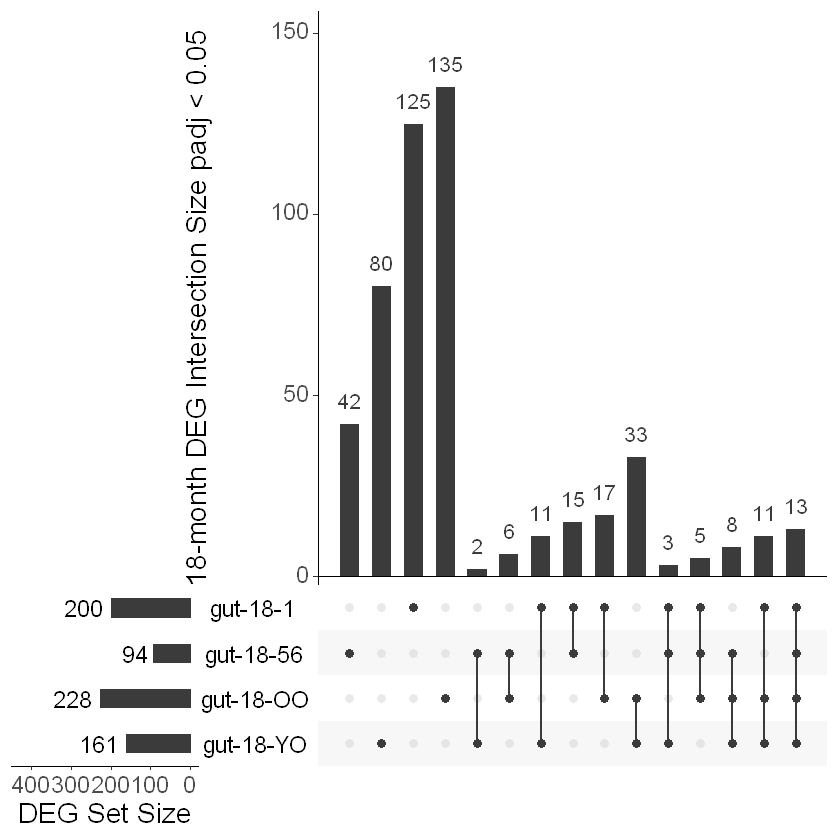

In [25]:
###### based on pvalue, not the padj

load(paste(file_name,"/DEG_data0415.RData",sep = ""))

h=DEG_res$`gut-18-56`


p_threshold=0.05

upset_df=upset_get(DEG_res,pvar = "pvalue",p_threshold = p_threshold)

upset_df1=upset_df[,!is.na(str_match(colnames(upset_df),"18"))]
upset_df1=upset_df1[,c("gut-18-1","gut-18-56","gut-18-OO","gut-18-YO")]

p=  UpSetR::upset(upset_df1,nsets = 10,nintersects = 60,
                  keep.order = T,sets = rev(c("gut-18-1","gut-18-56","gut-18-OO","gut-18-YO")),
                  mainbar.y.label = paste("18-month DEG Intersection Size padj <",p_threshold),
                  sets.x.label = "DEG Set Size", set_size.show = T,
                  text.scale = c(2,2,2,2,2,2),
                  set_size.scale_max = max(colSums(upset_df1))+200,
                  decreasing = c(FALSE,FALSE))
p


## DEGs analysis and heatmap

[1] 2.708352

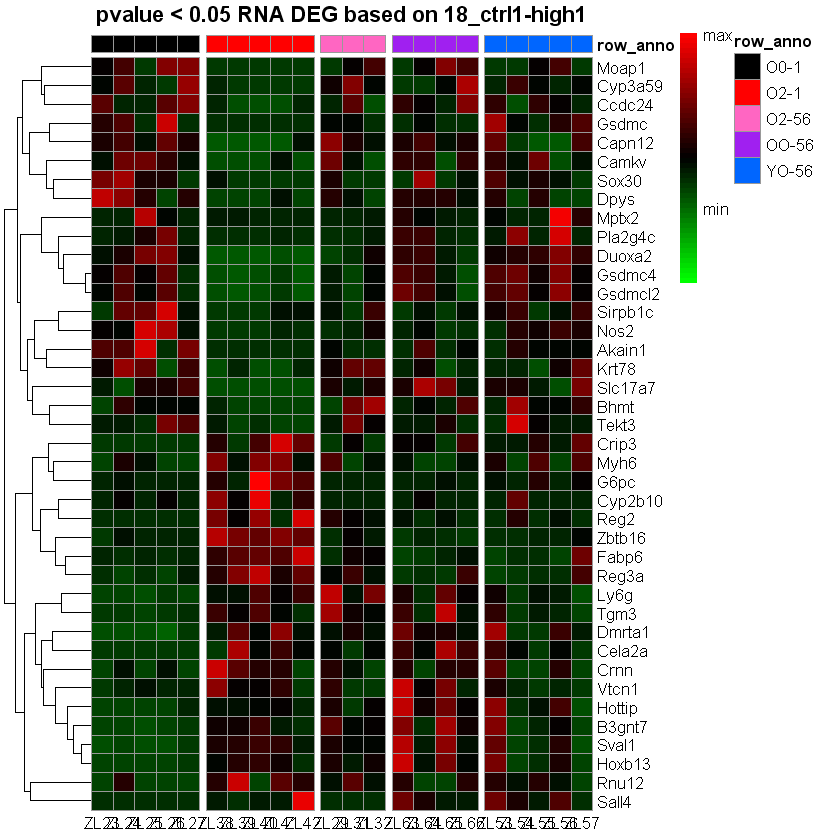

In [27]:
### DEGs analysis -----------

load(paste(file_name,"/DEG_data0415.RData",sep = ""))


### select pvalue <0.05
h=DEG_res$`gut-18-1`

rna_high1_ctrl=DEG_res$`gut-18-1` 
sum(rna_high1_ctrl$pvalue)
# rna_high1_ctrl1 <- rna_high1_ctrl[rna_high1_ctrl$pvalue<0.05,]

rna_high1_ctrl1 <- arrange(rna_high1_ctrl,pvalue) %>% head(.,n=30)

## fold change
rna_high1_ctrl1 <- arrange(rna_high1_ctrl,log2FoldChange)

rna_high1_ctrl1= rbind(head(rna_high1_ctrl1,n=20),
                       tail(rna_high1_ctrl1,n=20))

meta_1=meta
meta_1$mix = paste(meta$donor2acceptor,meta$treatment_time,sep = "-")

meta2=sub_select(meta_1,var1="mix",var1_sub = c("O0-1","O2-1","O2-56","OO-56","YO-56"))







#######* plot the heatmap based on DEG from ctrl and high day 1 in all groups-------

p=pheatmap_plot(counts=counts,meta2,DEG=rna_high1_ctrl1,cluster_cols = FALSE, 
                # scale="none",
                title_name = paste("pvalue < 0.05","RNA DEG based on 18_ctrl1-high1"),Annotation = TRUE,
                row_colors = color_db[c("O0","O2","O3","OO","YO"),"value"])

p

## volcano plot

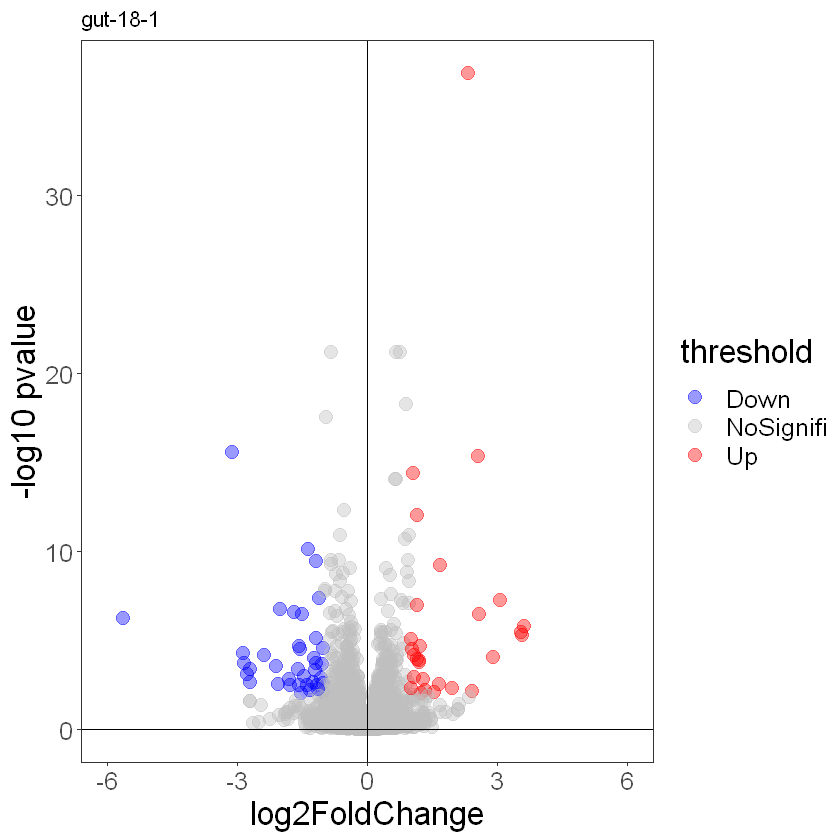

In [28]:
######## volcano ---------
###* FDR  p < 0.01 as the heatmap--------
load(paste(file_name,"/DEG_data_all0415.RData",sep = ""))



padj=0.01
i=1

DEG_df=DEG_res_all[[i]]
  
DEG_df1=DEG_df[is.na(str_match(DEG_df$id,"^[0-9]+")),]
  
p=plot_volcano(df=DEG_df1,y = "padj",y_threshold=padj,log2FoldChange_threshold=3 )+
    labs(title=names(DEG_res_all[i]))+xlim(-6,6)
  

p

# venn plot

In [ ]:
########* gene venn ---------

library(VennDiagram)

load(paste(file_name,"/DEG_data0415.RData",sep = ""))
### set padj for small numbers of DEGs
p_threshold=0.05
pvar = "pvalue"
upset_df=upset_get(DEG_res,pvar = pvar,p_threshold = p_threshold)

# write.csv(upset_df,paste(file_name,"/venn_data.csv",sep = ""))




venn.diagram(
  x=list("gut-20-56"=as.vector(venn_df$`gut-18-56`),
         "gut-20-OO"=as.vector(venn_df$`gut-18-OO`),
         "gut-20-YO"=as.vector(venn_df$`gut-18-YO`)),
  fill=c(color_db[c("OO_DSS","OO","YO"),"value"]),
  alpha=0.5,
  filename=paste(file_name,"/20 months gut only three venn,",pvar,"-",p_threshold,".png",sep = ""))
